### Задание 1

Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

R2 = 0.711226005748496


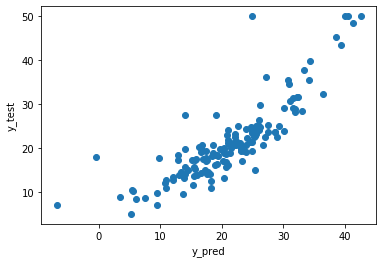

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston, load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
%matplotlib inline

def R2_plot(y_pred, y_test):
    print(f'R2 = {r2_score(y_test, y_pred)}')
    plt.scatter(y_pred, y_test)
    plt.xlabel('y_pred')
    plt.ylabel('y_test')
    plt.show()


boston = load_boston()
data, feature_names, target = boston['data'], boston['feature_names'], boston['target']

X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

R2_plot(y_pred, y_test)

### Задание 2

Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.

R2 = 0.8749965273218174


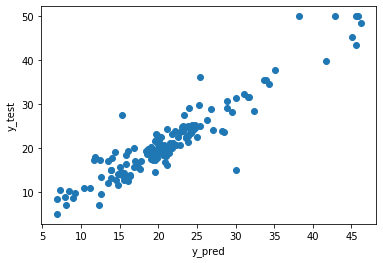

In [2]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 1000, max_depth = 12, random_state = 42)
model.fit(X_train, y_train.values[:, 0])

y_pred = model.predict(X_test)

R2_plot(y_pred, y_test)

# Данная модель работает лучше, R^2 выше

### *Задание 3

Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.

In [3]:
print(f'Сумма показателей важности: {sum(model.feature_importances_)}')

pd.DataFrame({'feat_importance': model.feature_importances_}, index = X_train.columns).\
sort_values(by = 'feat_importance', ascending=False).head(2)

Сумма показателей важности: 0.9999999999999999


,feat_importance
LSTAT,0.415679
RM,0.402705


### *Задание 4


В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке Matplotlib, это датасет Credit Card Fraud Detection.Для этого датасета мы будем решать задачу классификации - будем определять,какие из транзакциции по кредитной карте являются мошенническими.Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель.Мы будем вычислять AUC, то есть площадь под кривой ROC.
Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.
Загрузите датасет creditcard.csv и создайте датафрейм df.

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('creditcard.csv')

In [5]:
# С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована.
print(df.Class.value_counts(normalize=True), '\n')

# Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.
df.info(verbose=False)

# Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма: pd.options.display.max_columns = 100.
pd.options.display.max_columns = 100

# Просмотрите первые 10 строк датафрейма df.
df.head(10)

0    0.998273
1    0.001727
Name: Class, dtype: float64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Columns: 31 entries, Time to Class
dtypes: float64(30), int64(1)
memory usage: 67.4 MB


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [6]:
# Создайте датафрейм X из датафрейма df, исключив столбец Class.
X = df.drop(['Class'], axis='columns')

# Создайте объект Series под названием y из столбца Class.
y = df.Class

# Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы: 
# test_size=0.3, random_state=100, stratify=y. У вас должны получиться объекты X_train, X_test, y_train и y_test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100, stratify=y)

# Просмотрите информацию о их форме.
print(f'df {df.shape}\nX_train {X_train.shape}, X_test {X_test.shape}\ny_train {y_train.shape}, y_test {y_test.shape}')

df (284807, 31)
X_train (199364, 30), X_test (85443, 30)
y_train (199364,), y_test (85443,)


In [7]:
#Для поиска по сетке параметров задайте такие параметры:
#parameters = [{'n_estimators': [10, 15], 'max_features': np.arange(3, 5), 'max_depth': np.arange(4, 7)}]

parameters = {'n_estimators': [10, 15], 'max_features': np.arange(3, 5), 'max_depth': np.arange(4, 7)}

#Создайте модель GridSearchCV со следующими аргументами:
#estimator=RandomForestClassifier(random_state=100), param_grid=parameters, scoring='roc_auc', cv=3.

clf = GridSearchCV(estimator=RandomForestClassifier(random_state=100), param_grid=parameters, scoring='roc_auc', cv=3)

# Обучите модель на тренировочном наборе данных (может занять несколько минут).

clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={

In [8]:
#Просмотрите параметры лучшей модели с помощью атрибута best_params_.

print(f'best_params_: {clf.best_params_}')

#Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.
# Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) 
# и запишите в массив y_pred_proba. 

y_pred_proba = clf.predict_proba(X_test)[:, 1]
y_pred_proba

best_params_: {'max_depth': 6, 'max_features': 3, 'n_estimators': 15}


array([0.00092917, 0.00029521, 0.00028215, ..., 0.00028215, 0.0006822 ,
       0.01246098])

In [9]:
# Из модуля sklearn.metrics импортируйте метрику roc_auc_score.
# Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, 
# используя в качестве аргументов массивы y_test и y_pred_proba.

from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_proba)

0.9462664156037156

### *Дополнительные задания:

In [10]:
# 1). Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в переменную data

data = load_wine()

# 2). Полученный датасет не является датафреймом. Это структура данных, имеющая ключи аналогично словарю. 
#     Просмотрите тип данных этой структуры данных и создайте список data_keys, содержащий ее ключи.

print(type(data))
data_keys = data.keys()
data_keys

<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [11]:
# 3). Просмотрите данные, описание и названия признаков в датасете. 
#     Описание нужно вывести в виде привычного, аккуратно оформленного текста, 
#     без обозначений переноса строки, но с самими переносами и т.д.

print('Данные:\n', data.data,
      '\n\nОписание:\n', data.DESCR, 
      '\n\nНазвания признаков:\n', data.feature_names)

Данные:
 [[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]] 

Описание:
 .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - 

In [20]:
# 4). Сколько классов содержит целевая переменная датасета? Выведите названия классов.

print(f'Кол-во классов: {len(data.target_names)}\nИмена: {data.target_names}')

Кол-во классов: 3
Имена: ['class_0' 'class_1' 'class_2']


In [13]:
# 5). На основе данных датасета (они содержатся в двумерном массиве Numpy) и 
#     названий признаков создайте датафрейм под названием X.

X = pd.DataFrame(data.data, columns = data.feature_names)
X.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0


In [14]:
# 6). Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
dtypes: float64(13)
memory usage: 18.2 KB


In [15]:
# 7). Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64. 
#     Название поля - 'target'.

X['target'] = data.target.astype(np.int64)
X[['target']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 1 columns):
target    178 non-null int64
dtypes: int64(1)
memory usage: 1.5 KB


In [16]:
# 8). Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название X_corr.

X_corr = X.corr()

In [17]:
# 9). Создайте список high_corr из признаков, корреляция которых с полем target по абсолютному 
# значению превышает 0.5 (причем, само поле target не должно входить в этот список).

high_corr = list(X_corr[(X_corr.target > 0.5) & (X_corr.target < 1)].index)
high_corr

['alcalinity_of_ash']

In [18]:
# 10). Удалите из датафрейма X поле с целевой переменной. 
X.drop(['target'], axis='columns', inplace = True)

# Для всех признаков, названия которых содержатся в списке high_corr, 
# вычислите квадрат их значений и добавьте в датафрейм X соответствующие поля с суффиксом '_2', 
# добавленного к первоначальному названию признака. 

for i in high_corr:
    X[i + '_2'] = X[i]**2

# Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, 
# а также поля с признаками из списка high_corr, возведенными в квадрат. 
# Выведите описание полей датафрейма X с помощью метода describe.

X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcalinity_of_ash_2
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,391.142865
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,133.671775
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,112.360000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,295.840000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,380.250000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,462.250000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,900.000000
